In [139]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

### Step 1. Creating a dataframe from a csv file

In [140]:

df = pd.read_csv('datasets/chronic_kidney_disease_full.csv', usecols=['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'class' ], na_values=['?', ''])
df

df.replace({'\t?': np.nan}, inplace=True)

### Step 2. Finding the unique values in the hemoglobin column.

In [141]:
df['hemo'].unique()

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1,
       11.9, 13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. ,
       11.8, 11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,
        9. ,  8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8,
       11.5,  7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5,
       16.2, 14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9,
       16. , 14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3,
       17.3, 17.4, 17.7, 17.8, 17.5, 17.6])

### Step 3. Converting the hemoglobin values g/dl from g/l.

In [142]:
df['hemo'] = df['hemo'] / 10

In [143]:
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38,6000,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31,7500,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47,6700,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54,7800,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49,6600,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51,7200,5.9,notckd


In [144]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd', 'no'], dtype=object)

### Step 4. Replace the values of the column class with 'a' or 'c'. (a: affected, c: control)

In [145]:
df['class'] = df['class'].replace({'ckd': 'a', 'ckd\t' : 'a', 'no': 'c', 'notckd' : 'c'})
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,a
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,1.13,38,6000,NaN,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31,7500,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47,6700,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54,7800,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49,6600,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51,7200,5.9,c


### Step 5. Drop the rows with missing values.

In [146]:
df = df.dropna(thresh=len(df.columns) - 2)
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39,7800,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,1.24,36,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47,6700,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54,7800,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49,6600,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51,7200,5.9,c


In [147]:
df_a = df[df['class'] == 'a']
df_c = df[df['class'] == 'c']

In [148]:
# 127 rows in total
df_a

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44,7800,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32,6700,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35,7300,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39,7800,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,1.24,36,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,1.34,47,11000,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,1.22,40,9800,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,0.86,26,5000,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,1.26,37,10200,4.1,a


In [149]:
# 139 rows in total
df_c

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,1.50,48,10400,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,1.70,52,9800,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,1.59,46,9100,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,1.54,42,6200,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,1.30,49,8300,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47,6700,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54,7800,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49,6600,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51,7200,5.9,c


In [150]:
df_a.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,1.064320
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,0.218965
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,0.950000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,1.080000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,1.200000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,1.610000


In [151]:
df_c.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,1.518832
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,0.128453
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,1.410000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,1.500000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,1.620000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,1.780000


### Step 7. Plot the histograms of the columns of the dataframe a.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'sg'}>],
       [<Axes: title={'center': 'al'}>, <Axes: title={'center': 'su'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sod'}>,
        <Axes: title={'center': 'pot'}>],
       [<Axes: title={'center': 'hemo'}>, <Axes: >, <Axes: >]],
      dtype=object)

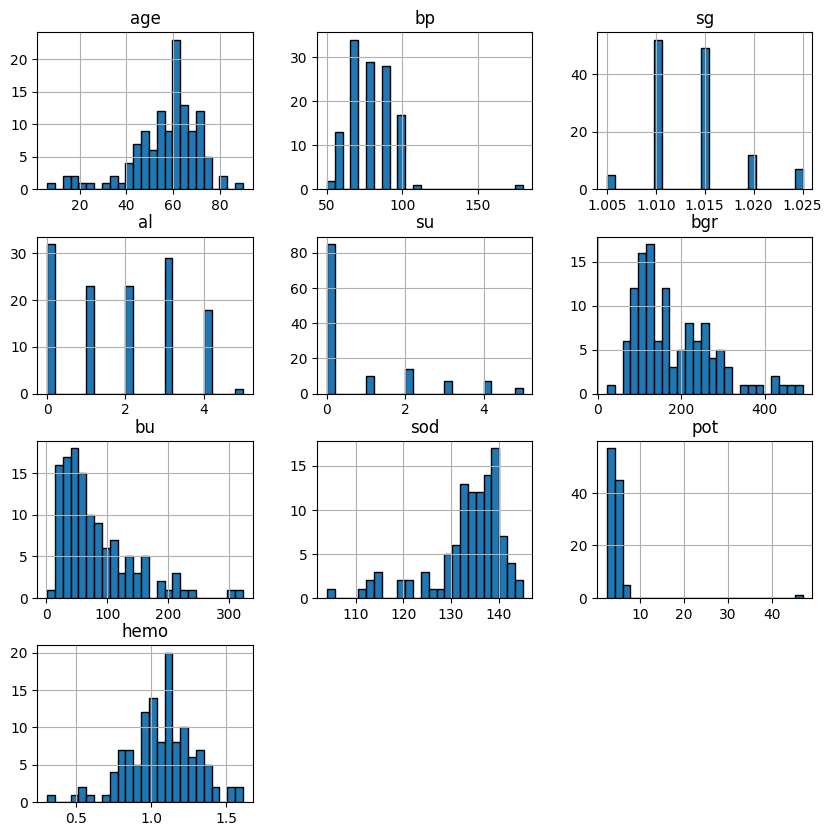

In [152]:
df_a[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']].hist(bins=25, edgecolor='black', figsize=[10,10])

### Step 8. Plot the histograms of the columns of dataframe c.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'sg'}>],
       [<Axes: title={'center': 'al'}>, <Axes: title={'center': 'su'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sod'}>,
        <Axes: title={'center': 'pot'}>],
       [<Axes: title={'center': 'hemo'}>, <Axes: >, <Axes: >]],
      dtype=object)

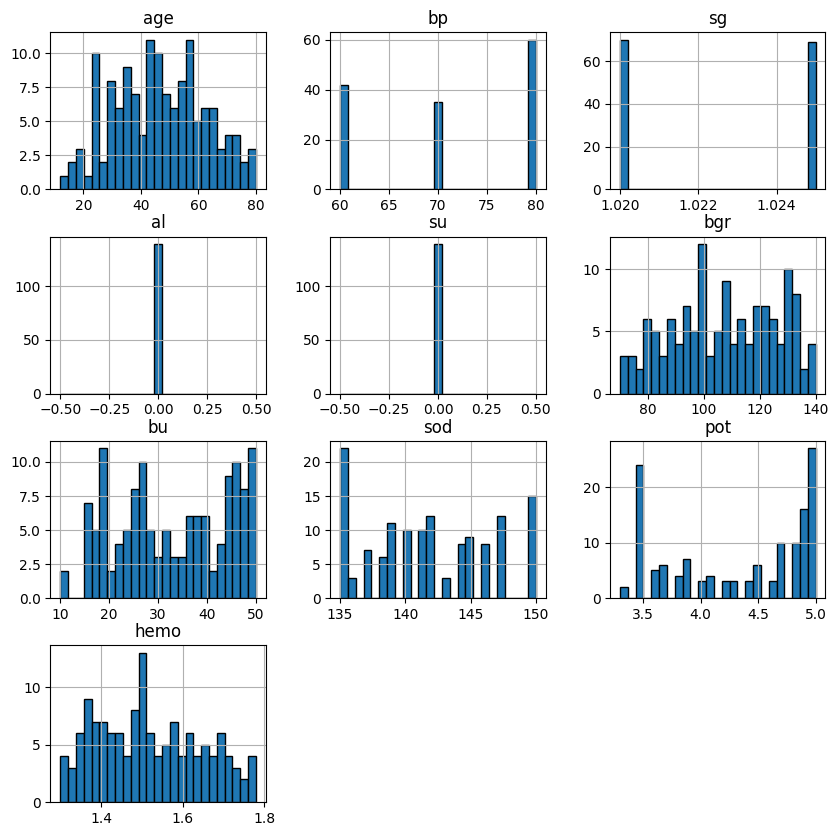

In [153]:
df_c[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']].hist(bins=25, edgecolor='black', figsize=[10,10])

In [154]:
df_c = df_c[(df['bgr'] >= 400)]

C:\Users\onnil\AppData\Local\Temp\ipykernel_20100\429059263.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_c = df_c[(df['bgr'] >= 400)]


In [155]:
#Correlation matrix
corr = df_a.drop(columns=['class']).corr()
corr

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.061731,-0.004869,-0.016726,0.138945,0.205133,0.022593,-0.033951,-0.007490,-0.006174,-0.044467,0.015848,-0.016616
bp,0.061731,1.000000,0.066651,0.022210,0.181615,0.041162,0.064547,0.148208,0.068721,-0.097107,-0.104029,-0.040061,0.095163
sg,-0.004869,0.066651,1.000000,-0.061509,-0.044993,-0.083967,-0.037977,0.143235,0.046375,0.114042,0.106808,-0.026688,0.120779
al,-0.016726,0.022210,-0.061509,1.000000,0.115618,0.099096,0.426974,-0.179331,0.176842,-0.371257,-0.329337,0.067898,-0.231920
su,0.138945,0.181615,-0.044993,0.115618,1.000000,0.692159,-0.053597,0.052022,0.152143,0.184927,0.120275,0.103631,0.091519
bgr,0.205133,0.041162,-0.083967,0.099096,0.692159,1.000000,-0.029130,-0.053968,0.019949,0.144666,0.097501,0.049505,0.140348
bu,0.022593,0.064547,-0.037977,0.426974,-0.053597,-0.029130,1.000000,-0.320019,0.197928,-0.608652,-0.568745,-0.135999,-0.487755
sod,-0.033951,0.148208,0.143235,-0.179331,0.052022,-0.053968,-0.320019,1.000000,0.002814,0.295139,0.317933,0.019716,0.266934
pot,-0.007490,0.068721,0.046375,0.176842,0.152143,0.019949,0.197928,0.002814,1.000000,-0.181083,-0.198267,-0.169084,-0.185432
hemo,-0.006174,-0.097107,0.114042,-0.371257,0.184927,0.144666,-0.608652,0.295139,-0.181083,1.000000,0.951500,0.071613,0.779202


<Axes: >

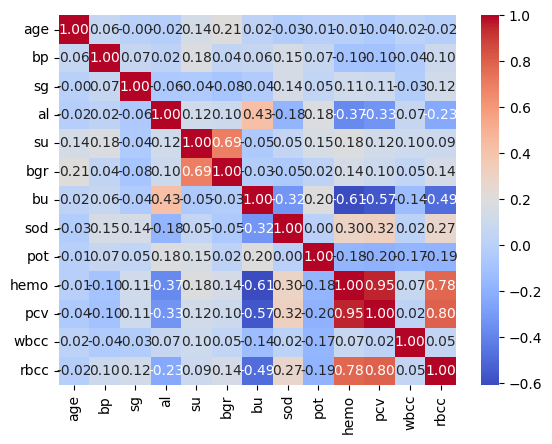

In [156]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Red blood cell count has a big correlation with hemoglobin
# Blood urine has a large correlation with albumin
# Packed cell volume has high correlation with red blood cell count
# Red blood cell count has almost no correlation with albumin
# We can clearly see what values have high correlation with eachother with the matrix.